<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_ticker_deep_sarsa_walkforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall \
    dask==2024.11.2 \
    rapids-dask-dependency==24.12.0 \
    cudf-cu12==24.12.0 \
    cuml-cu12==24.12.0 \
    pylibraft-cu12==24.12.0 \
    pylibcudf-cu12==24.12.0 \
    numba==0.61.0 --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 901.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirem

In [2]:

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 16.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [3]:
#Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip install tensorflow==2.12.0

#Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 70.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 87.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 112.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 9.7 MB/s eta 0:00:00
  Att

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
flax 0.10.5 requires jax>=0.5.1, but you have jax 0.4.30 which is incompatible.
pylibcug

In [1]:
import torch
import cudf
import cuml
import dask
import pandas as pd
import numpy as np
import scipy
import lightgbm as lgb
import gymnasium as gym
import stable_baselines3

#Version Checks
print(" Library Versions")
print("--------------------")
print(" PyTorch:", torch.__version__)
print(" CUDA:", torch.version.cuda)
print(" cuDF:", cudf.__version__)
print(" cuML:", cuml.__version__)
print(" Dask:", dask.__version__)
print(" Pandas:", pd.__version__)
print(" NumPy:", np.__version__)
print(" SciPy:", scipy.__version__)
print(" LightGBM:", lgb.__version__)
print(" Gymnasium:", gym.__version__)
print(" Stable Baselines3:", stable_baselines3.__version__)

# GPU Check (Torch + NVIDIA)
print("\n GPU Availability")
print("--------------------")
print(" PyTorch GPU Available:", torch.cuda.is_available())
print(" GPU Count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print(" GPU Name:", torch.cuda.get_device_name(0))

 Library Versions
--------------------
 PyTorch: 2.6.0+cu124
 CUDA: 12.4
 cuDF: 24.12.00
 cuML: 24.12.00
 Dask: 2024.11.2
 Pandas: 2.2.3
 NumPy: 1.24.4
 SciPy: 1.15.2
 LightGBM: 4.5.0
 Gymnasium: 1.1.1
 Stable Baselines3: 2.6.0

 GPU Availability
--------------------
 PyTorch GPU Available: True
 GPU Count: 1
 GPU Name: Tesla T4


In [2]:
#Clean install of TensorFlow compatible with Colab's GPU (CUDA 11.8 + cuDNN 8.x)
!pip uninstall -y tensorflow keras
!pip install tensorflow==2.12.0

#Restart runtime after this!
!pip install numpy==1.24.4 --force-reinstall

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Successfully uninstalled tensorflow-2.12.0
Found existing installation: keras 2.12.0
Uninstalling keras-2.12.0:
  Successfully uninstalled keras-2.12.0
  Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached tensorflow-2.12.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (586.0 MB)
Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the pack

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have ri

In [1]:
#Core & System Utilities
import os
import gc
import sys
import time
import json
import pickle
import random
from datetime import datetime
from collections import defaultdict, deque

#Data Science Essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numba

#Financial Data
import yfinance as yf

#Machine Learning & Preprocessing
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix
)

#Deep Learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Input, backend as K
from tensorflow.keras import mixed_precision

#Visualization & Display
import IPython.display as display

#RAPIDS Libraries (for GPU-accelerated ML, optional)
import cupy as cp

#Reinforcement Learning (Stable Baselines3)
import stable_baselines3
from stable_baselines3 import A2C, DDPG, DQN, PPO, SAC, TD3
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

#Gym & Trading Environments
import gym
import gymnasium as gym
import gym_anytrading
from gym.spaces import Box
from gymnasium.spaces import Box as GymBox, Discrete
from gymnasium.wrappers import TimeLimit

#CUDA (Optional Paths - for manual GPU configuration)
os.environ['CUDA_HOME'] = '/usr/local/cuda-11.8'
os.environ['PATH'] += ':/usr/local/cuda-11.8/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-11.8/lib64'

#GPU Check (Colab only)
!nvidia-smi


Mon Apr 21 15:56:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   31C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Required for TensorFlow compatibility (GPU + cuDNN)
!pip uninstall -y tensorflow keras -q
!pip install tensorflow==2.12.0 -q

# Fix protobuf compatibility
!pip install protobuf==3.20.3 -q

# Essential packages
!pip install numpy==1.24.4 pandas joblib yfinance scikit-learn matplotlib -q


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.61.0 requires numpy<2.2,>=1.24, but you have numpy 1.23.5 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
flax 0.10.5 requires jax>=0.5.1, but you ha

In [3]:
import os
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
else:
    print("ogle Drive is already mounted.")



Mounted at /content/drive


In [4]:
#Downgrade NumPy to a compatible version
!pip install numpy==1.24.4 --force-reinstall

#Reinstall LightGBM after fixing NumPy
!pip install lightgbm --force-reinstall --no-cache-dir


  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
cudf-polars-cu12 25.2.2 requires pylibcudf-cu12==25.2.*, but you have pylibcudf-cu12 24.12.0 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have ri

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 118.9 MB/s eta 0:00:00
^C


In [1]:
!pip install -U scikit-learn==1.3.2 --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 68.0 MB/s eta 0:00:00


In [2]:
!pip install yfinance

In [14]:
#Imports
import os, gc, random
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from datetime import datetime, timedelta

#Config
TICKERS = ["AAPL", "TSLA", "MSFT", "GOOG", "AMZN", "NVDA", "META", "JPM", "BAC", "WMT",
               "UNH", "V", "PG", "HD", "MA", "DIS", "PEP", "KO", "CSCO", "ADBE", "CRM", "NFLX",
               "PFE", "MRK", "T", "ORCL", "ABBV", "CVX", "XOM", "ABT", "COST", "QCOM", "INTC",
               "MCD", "NKE", "DHR", "LLY", "MDT", "TMO", "TXN", "PM", "AVGO", "NEE", "ACN", "UPS",
               "HON", "LIN", "GS", "IBM"]

SEQUENCE_LENGTH = 60
SAVE_DIR = "/content/drive/MyDrive/DeepSARSA_Models"
os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Feature Engineering
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    df['MACD'] = df['Close'].ewm(span=12, adjust=False).mean() - df['Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['ATR'] = df['High'].rolling(window=14).max() - df['Low'].rolling(window=14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

#Deep SARSA Model
class DQNNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNNet, self).__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.out = nn.Linear(32, output_dim)

    def forward(self, x):
        h, _ = self.lstm(x)
        h = h[:, -1, :]  # last hidden state
        x = torch.relu(self.fc1(h))
        return self.out(x)

class DeepSARSAAgent:
    def __init__(self, input_dim, action_dim, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        self.model = DQNNet(input_dim, action_dim).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return random.randint(0, 2)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, next_action, done):
        q_values = self.model(state)
        next_q_values = self.model(next_state)
        target = reward + self.gamma * next_q_values[0, next_action] * (1 - int(done))
        loss = self.criterion(q_values[0, action], target.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

def train_agent_on_stock(ticker, episodes=10):
    print(f"\nTraining Deep SARSA on {ticker}")

    # Use last 720 days dynamically
    today = datetime.today()
    end = today
    start = end - timedelta(days=720)
    start_str = start.strftime('%Y-%m-%d')
    end_str = end.strftime('%Y-%m-%d')

    # Now use dynamic start/end in yfinance download
    df = yf.download(ticker, start=start_str, end=end_str, interval="1h", progress=False)

    if df.empty:
        print(f"No data for {ticker}, skipping.")
        return

    # Rest of your training logic goes here...
    print(f"Downloaded {len(df)} rows for {ticker}")

    df = compute_technical_indicators(df)
    features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV']
    df = df[features].copy()

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)

    # Create sequences
    X = []
    for i in range(SEQUENCE_LENGTH, len(scaled)):
        X.append(scaled[i-SEQUENCE_LENGTH:i])
    X = np.array(X)

    state_dim = X.shape[2]
    agent = DeepSARSAAgent(state_dim, 3)

    for ep in range(episodes):
        state_idx = random.randint(0, len(X) - 2)
        state = torch.tensor(X[state_idx][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=1.0 - ep/episodes)
        total_reward = 0

        for t in range(state_idx, len(X) - 1):
            next_state = torch.tensor(X[t+1][None], dtype=torch.float32).to(device)
            #FIXED: Use last timestep and first feature (assumed 'Close')
            reward = float(X[t+1, -1, 0] - X[t, -1, 0])
            done = t + 2 == len(X)
            next_action = agent.select_action(next_state, epsilon=1.0 - ep/episodes)
            agent.update(state, action, reward, next_state, next_action, done)
            total_reward += reward
            if done:
                break
            state, action = next_state, next_action

        print(f"Episode {ep+1}: Total Reward = {total_reward:.4f}")

    # Save model
    model_path = f"{SAVE_DIR}/deep_sarsa_{ticker}.pth"
    torch.save(agent.model.state_dict(), model_path)
    print(f"Saved model to {model_path}")

#Train on All Tickers
# Train on All Tickers and collect rewards
# Train on All Tickers and collect rewards
rewards = {}
for ticker in TICKERS:
    reward = train_agent_on_stock(ticker, episodes=5)
    rewards[ticker] = reward if reward is not None else 0
    gc.collect()
    torch.cuda.empty_cache()

# Display summary
import pandas as pd
df = pd.DataFrame(rewards.items(), columns=["Ticker", "Total Reward"])
df["Portfolio Value"] = 100000 * (1 + df["Total Reward"])
df = df.sort_values(by="Portfolio Value", ascending=False)

print("\n Top 5 Performers:")
print(df.head())

print("\nBottom 5 Performers:")
print(df.tail())

# Optional: Save results to CSV
os.makedirs("results/sarsa_summary", exist_ok=True)
df.to_csv("results/sarsa_summary/total_rewards.csv", index=False)
print("\nSaved summary to results/sarsa_summary/total_rewards.csv")


Training Deep SARSA on AAPL
Downloaded 3431 rows for AAPL
Episode 1: Total Reward = 0.2545
Episode 2: Total Reward = -0.1989
Episode 3: Total Reward = -0.4491
Episode 4: Total Reward = 0.2364
Episode 5: Total Reward = 0.0695
Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_AAPL.pth

Training Deep SARSA on TSLA
Downloaded 3431 rows for TSLA
Episode 1: Total Reward = 0.0859
Episode 2: Total Reward = -0.0555
Episode 3: Total Reward = 0.0574
Episode 4: Total Reward = 0.0663
Episode 5: Total Reward = -0.0332
Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_TSLA.pth

Training Deep SARSA on MSFT
Downloaded 3431 rows for MSFT
Episode 1: Total Reward = -0.2538
Episode 2: Total Reward = -0.1542
Episode 3: Total Reward = -0.3395
Episode 4: Total Reward = 0.2430
Episode 5: Total Reward = 0.2659
Saved model to /content/drive/MyDrive/DeepSARSA_Models/deep_sarsa_MSFT.pth

Training Deep SARSA on GOOG
Downloaded 3431 rows for GOOG
Episode 1: Total Reward = -0.0064
Epi


Using date range: 2023-05-02 → 2024-07-05 → 2025-04-21
Total days: 720

Training AAPL from 2023-05-02 to 2025-04-21
Saved: ./deep_sarsa_models/deep_sarsa_AAPL_2023-05-02_2025-04-21.pth | Reward: -0.25

Training TSLA from 2023-05-02 to 2025-04-21
Saved: ./deep_sarsa_models/deep_sarsa_TSLA_2023-05-02_2025-04-21.pth | Reward: -0.02

Training MSFT from 2023-05-02 to 2025-04-21
Saved: ./deep_sarsa_models/deep_sarsa_MSFT_2023-05-02_2025-04-21.pth | Reward: -0.57

Training GOOG from 2023-05-02 to 2025-04-21
Saved: ./deep_sarsa_models/deep_sarsa_GOOG_2023-05-02_2025-04-21.pth | Reward: -0.38

Training AMZN from 2023-05-02 to 2025-04-21
Saved: ./deep_sarsa_models/deep_sarsa_AMZN_2023-05-02_2025-04-21.pth | Reward: -0.19

Training NVDA from 2023-05-02 to 2025-04-21
Saved: ./deep_sarsa_models/deep_sarsa_NVDA_2023-05-02_2025-04-21.pth | Reward: -0.22

Training META from 2023-05-02 to 2025-04-21
Saved: ./deep_sarsa_models/deep_sarsa_META_2023-05-02_2025-04-21.pth | Reward: -0.02

Training JPM from

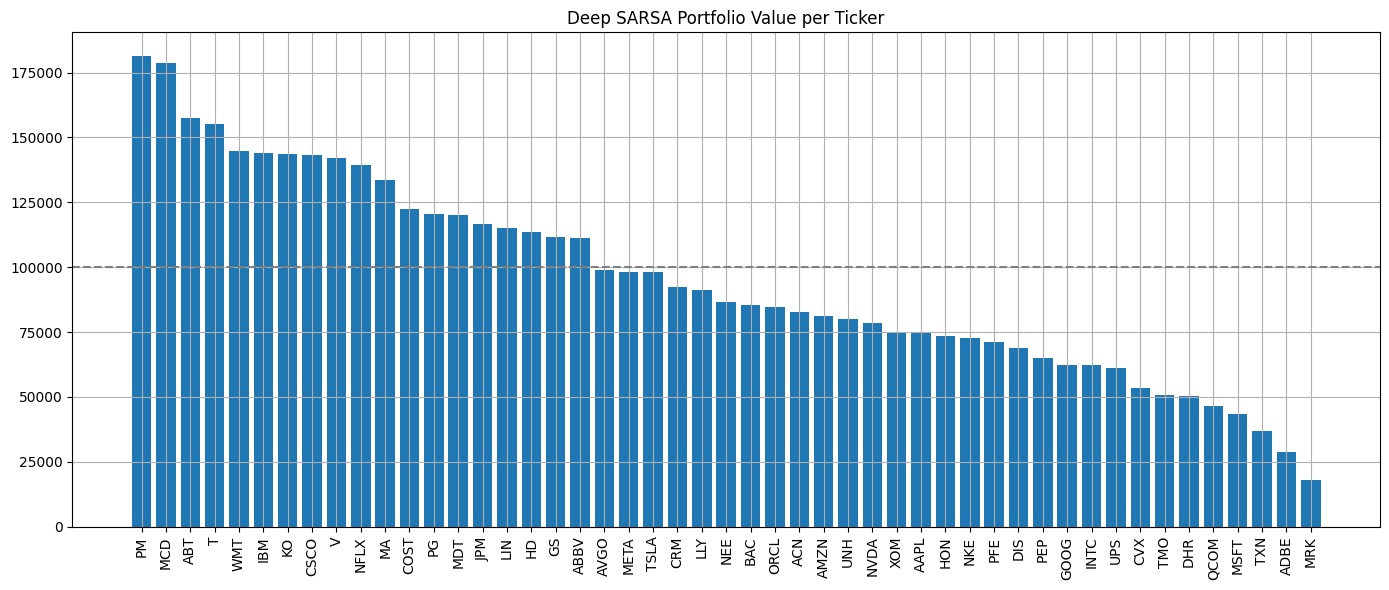

In [17]:
from datetime import datetime, timedelta
import os, gc, random
import numpy as np
import pandas as pd
import yfinance as yf
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Config
TICKERS = ["AAPL", "TSLA", "MSFT", "GOOG", "AMZN", "NVDA", "META", "JPM", "BAC", "WMT",
           "UNH", "V", "PG", "HD", "MA", "DIS", "PEP", "KO", "CSCO", "ADBE", "CRM", "NFLX",
           "PFE", "MRK", "T", "ORCL", "ABBV", "CVX", "XOM", "ABT", "COST", "QCOM", "INTC",
           "MCD", "NKE", "DHR", "LLY", "MDT", "TMO", "TXN", "PM", "AVGO", "NEE", "ACN", "UPS",
           "HON", "LIN", "GS", "IBM"]
SEQUENCE_LENGTH = 60
SAVE_DIR = "./deep_sarsa_models"
os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Technical Indicators
def compute_technical_indicators(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['EMA_20'] = df['Close'].ewm(span=20).mean()
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / (loss + 1e-6)
    df['RSI'] = 100 - (100 / (1 + rs))
    df['MACD'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9).mean()
    df['ATR'] = df['High'].rolling(14).max() - df['Low'].rolling(14).min()
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).fillna(0).cumsum()
    df.dropna(inplace=True)
    return df

# Deep SARSA Agent
class DQNNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQNNet, self).__init__()
        self.lstm = nn.LSTM(input_dim, 64, batch_first=True)
        self.fc1 = nn.Linear(64, 32)
        self.out = nn.Linear(32, output_dim)

    def forward(self, x):
        h, _ = self.lstm(x)
        h = h[:, -1, :]
        x = torch.relu(self.fc1(h))
        return self.out(x)

class DeepSARSAAgent:
    def __init__(self, input_dim, action_dim, lr=1e-3, gamma=0.99):
        self.gamma = gamma
        self.model = DQNNet(input_dim, action_dim).to(device)
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.criterion = nn.MSELoss()

    def select_action(self, state, epsilon):
        if random.random() < epsilon:
            return random.randint(0, 2)
        with torch.no_grad():
            q_values = self.model(state)
        return torch.argmax(q_values).item()

    def update(self, state, action, reward, next_state, next_action, done):
        q_values = self.model(state)
        next_q_values = self.model(next_state)
        target = reward + self.gamma * next_q_values[0, next_action] * (1 - int(done))
        loss = self.criterion(q_values[0, action], target.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Train and evaluate agent
def train_agent_on_split(train_X, test_X, episodes=5):
    agent = DeepSARSAAgent(train_X.shape[2], 3)

    for ep in range(episodes):
        idx = random.randint(0, len(train_X) - 2)
        state = torch.tensor(train_X[idx][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=1.0 - ep / episodes)
        for t in range(idx, len(train_X) - 1):
            next_state = torch.tensor(train_X[t+1][None], dtype=torch.float32).to(device)
            reward = float(train_X[t+1, -1, 0] - train_X[t, -1, 0])
            done = t + 2 == len(train_X)
            next_action = agent.select_action(next_state, epsilon=1.0 - ep / episodes)
            agent.update(state, action, reward, next_state, next_action, done)
            if done: break
            state, action = next_state, next_action

    test_rewards = []
    for t in range(len(test_X) - 1):
        state = torch.tensor(test_X[t][None], dtype=torch.float32).to(device)
        action = agent.select_action(state, epsilon=0.0)
        next_state = torch.tensor(test_X[t+1][None], dtype=torch.float32).to(device)
        reward = float(test_X[t+1, -1, 0] - test_X[t, -1, 0])
        test_rewards.append(reward)

    return np.sum(test_rewards), agent

# Date-based walkforward
def date_based_walkforward_train(ticker, train_start, train_end, test_start, test_end):
    print(f"\nTraining {ticker} from {train_start} to {test_end}")
    df = yf.download(ticker, start=train_start, end=test_end, interval="1h", progress=False)
    if df.empty:
        print("No data found.")
        return None

    df = compute_technical_indicators(df)
    features = ['Close', 'SMA_50', 'EMA_20', 'RSI', 'MACD', 'Signal_Line', 'ATR', 'OBV']
    scaled = MinMaxScaler().fit_transform(df[features])
    df_scaled = pd.DataFrame(scaled, index=df.index, columns=features)

    sequences = []
    for i in range(SEQUENCE_LENGTH, len(df_scaled)):
        timestamp = df_scaled.index[i]
        window = df_scaled.iloc[i - SEQUENCE_LENGTH:i].values
        sequences.append((timestamp, window))

    train_X = np.array([x[1] for x in sequences if train_start <= x[0].strftime('%Y-%m-%d') < train_end])
    test_X = np.array([x[1] for x in sequences if test_start <= x[0].strftime('%Y-%m-%d') < test_end])

    if len(train_X) < 2 or len(test_X) < 2:
        print("Insufficient train/test samples.")
        return None

    reward, agent = train_agent_on_split(train_X, test_X)
    model_path = f"{SAVE_DIR}/deep_sarsa_{ticker}_{train_start}_{test_end}.pth"
    torch.save(agent.model.state_dict(), model_path)
    print(f"Saved: {model_path} | Reward: {reward:.2f}")
    return reward

# Rolling range setup (last 730 days)
today = datetime.today()
end_date = today.strftime('%Y-%m-%d')
start_date = (today - timedelta(days=720)).strftime('%Y-%m-%d')
split_date = (today - timedelta(days=290)).strftime('%Y-%m-%d')  # ~60/40 split
print(f"\nUsing date range: {start_date} → {split_date} → {end_date}")
print(f"Total days: {(datetime.strptime(end_date, '%Y-%m-%d') - datetime.strptime(start_date, '%Y-%m-%d')).days}")

# Train on all
results = {}
for ticker in TICKERS:
    reward = date_based_walkforward_train(ticker, start_date, split_date, split_date, end_date)
    results[ticker] = reward if reward is not None else 0
    gc.collect()
    torch.cuda.empty_cache()

# Summary
df = pd.DataFrame(results.items(), columns=["Ticker", "Reward"])
df["Portfolio Value"] = 100000 * (1 + df["Reward"])
df = df.sort_values(by="Portfolio Value", ascending=False)

print("\nTop 5 Performers:")
print(df.head())

print("\n Bottom 5 Performers:")
print(df.tail())

plt.figure(figsize=(14, 6))
plt.bar(df["Ticker"], df["Portfolio Value"])
plt.axhline(100000, color='gray', linestyle='--')
plt.title("Deep SARSA Portfolio Value per Ticker")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Save results to CSV
os.makedirs("results/sarsa_summary", exist_ok=True)
df.to_csv("results/sarsa_summary/total_rewards.csv", index=False)
print("\nSaved summary to results/sarsa_summary/total_rewards.csv")